In [902]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Titanic: Machine Learning from Disaster

## Predict survival on the Titanic

1]Defining the problem statement

2]Collecting the data

3]Exploratory data analysis

4]Feature engineering

5]Modelling

6]Testing

# 1. Defining the problem statement

Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [903]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")



# 2. Collecting the data

training data set and testing data set are given by Kaggle you can download from kaggle directly

link-https://www.kaggle.com/c/titanic/data


The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [904]:
train_df = pd.read_csv('G:\\data\\kaggle_titanic\\train.csv')
test_df = pd.read_csv('G:\\data\\kaggle_titanic\\test.csv')
combine = [train_df, test_df]

# 3. Exploratory data analysis

Pandas also helps describe the datasets answering following questions early in our project.

**Which features are available in the dataset?**



In [905]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Which features are categorical?**

Categorical: Survived, Sex, and Embarked. Ordinal: Pclass

**Which features are numerical?**

Continous: Age, Fare. Discrete: SibSp, Parch.

In [906]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Ticket is a mix of numeric and alphanumeric data types.**

**Cabin is alphanumeric.**

In [907]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


 ### Details of the Data  

-survived: 0 = No, 1 = Yes

-pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

-sibsp: no. of siblings / spouses aboard the Titanic

-parch: no. of parents / children aboard the Titanic

-ticket: Ticket number

-cabin: Cabin number

-embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

ps-The following details was avaliable in kaggle website

In [908]:
train_df.shape

(891, 12)

In [909]:
test_df.shape

(418, 11)

number of passangers details avaliable for training-418

number of avaiable features/columns/details -11(except for the result/survial/target column)



In [910]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that Age value is missing for many rows.

Out of 891 rows, the Age value is present only in 714 rows.

Similarly, Cabin values are also missing in many rows. Only 204 out of 891 rows have Cabin values.

In [911]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that Age value is missing for many rows.

Out of 418 rows, the Age value is present only in 332 rows.

Similarly, Cabin values are also missing in many rows. Only 418 out of 91 rows have Cabin values.

In [912]:
print(train_df.isnull().sum())
print('_'*40)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [913]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [914]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [915]:
train_df[["Sex","Survived"]].groupby("Sex",as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


  **We can note that %survival of women is  higher**

In [916]:
train_df[["Pclass","Survived"]].groupby("Pclass",as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**We can note that %survival of Pclass 1 is highest**

In [917]:
train_df[["SibSp","Survived"]].groupby("SibSp",as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**We can note that %survival of people with 1 siblings is highest**

In [918]:
train_df[["Embarked","Survived"]].groupby("Embarked",as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


**We can note that %survival of people with Port of Embarkation as Cherbourg is highest**

In [919]:
train_df[["Parch","Survived"]].groupby("Parch",as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**We can note that %survival of people with no of parents/children =3  is highest**

## visualization of Data

### Bar Chart for Categorical Features 

-Pclass

-Sex

-SibSp ( # of siblings and spouse)

-Parch ( # of parents and children)

-Embarked

-Cabin

**We will try to Confirm some of the insighs gained from our previous code**

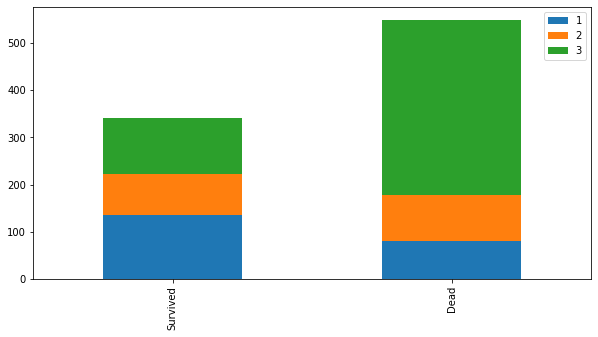

In [920]:
survived = train_df[train_df['Survived']==1]["Pclass"].value_counts()
dead = train_df[train_df['Survived']==0]["Pclass"].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### Insights gained
**The Chart confirms 1st class more likely survivied than other classes**

**The Chart confirms 3rd class more likely dead than other classes**

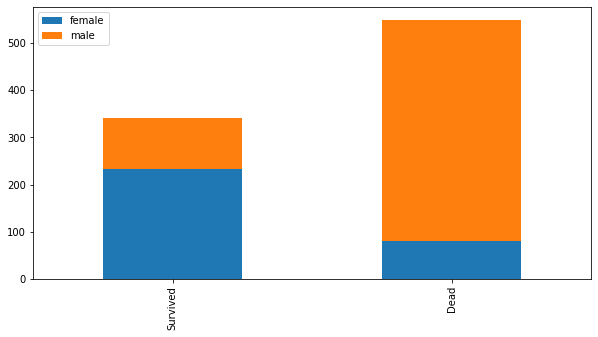

In [921]:
survived = train_df[train_df['Survived']==1]["Sex"].value_counts()
dead = train_df[train_df['Survived']==0]["Sex"].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### Insights gained
**The Chart confirms Women more likely survivied than Men**



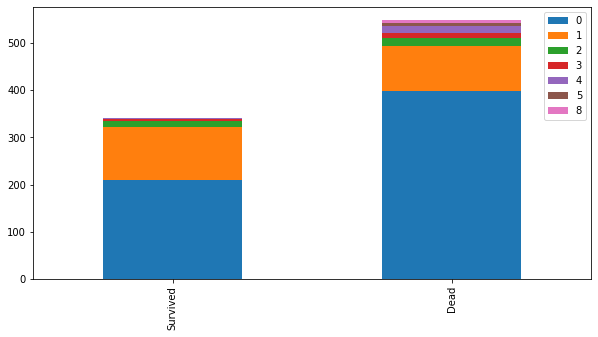

In [922]:
survived = train_df[train_df['Survived']==1]["SibSp"].value_counts()
dead = train_df[train_df['Survived']==0]["SibSp"].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### Insights gained
**The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived**

**The Chart confirms a person aboarded without siblings or spouse more likely dead**

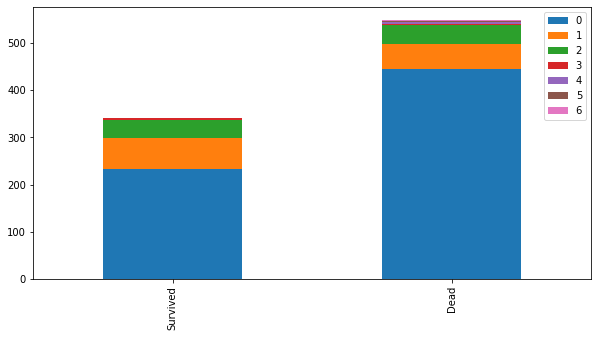

In [923]:
survived = train_df[train_df['Survived']==1]["Parch"].value_counts()
dead = train_df[train_df['Survived']==0]["Parch"].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### Insights gained
**The Chart confirms a person aboarded with more than 2 parents or children more likely survived**

**The Chart confirms a person aboarded alone more likely dead**

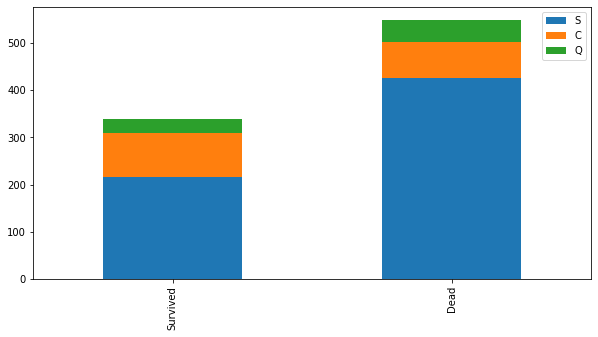

In [924]:
survived = train_df[train_df['Survived']==1]["Embarked"].value_counts()
dead = train_df[train_df['Survived']==0]["Embarked"].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### Insights gained
**The Chart confirms a person aboarded from C slightly more likely survived**

**The Chart confirms a person aboarded from Q more likely dead**

**The Chart confirms a person aboarded from S more likely dead**

# 4. Feature engineering
Feature engineering is the process of using domain knowledge of the data

to create features that make machine learning algorithms work.

**We are trying to create a new feature combinig no of spouse/siblings and no. of parents/children**

In [925]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [926]:
train_df[["FamilySize","Survived"]].groupby("FamilySize",as_index=False).mean().sort_values(by="Survived",ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We will drop some of the useless columns such as Ticket,Passenger id as thoose are not usefull to gain any insights from them and also sibsp and parch as we have added a new feature using thoose two features


In [927]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [928]:
train_df=train_df.drop(['SibSp','Parch','Ticket'],axis=1)

In [929]:
test_df=test_df.drop(['SibSp','Parch','Ticket'],axis=1)

In [930]:
train_df=train_df.drop(['PassengerId'],axis=1)

In [931]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1
5,0,3,"Moran, Mr. James",male,NaN,8.4583,NaN,Q,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,E46,S,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,NaN,S,5
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,NaN,S,3
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,NaN,C,2


**We will try to extract the titles from the name and check for its corelation**

In [932]:
train_test_data=[train_df,test_df]


In [933]:
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [934]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1,Mr


In [935]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,NaN,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,NaN,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,NaN,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,NaN,S,3,Mrs


Now we can drop the Name column as it has no use in prediction of the survival

In [936]:
train_df=train_df.drop(['Name'],axis=1)

In [937]:
test_df=test_df.drop(['Name'],axis=1)

In [938]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,male,22.0,7.2500,NaN,S,2,Mr
1,1,1,female,38.0,71.2833,C85,C,2,Mrs
2,1,3,female,26.0,7.9250,NaN,S,1,Miss
3,1,1,female,35.0,53.1000,C123,S,2,Mrs
4,0,3,male,35.0,8.0500,NaN,S,1,Mr


In [939]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   Fare         417 non-null    float64
 5   Cabin        91 non-null     object 
 6   Embarked     418 non-null    object 
 7   FamilySize   418 non-null    int64  
 8   Title        418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [940]:
train_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [941]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Ms            1
Mme           1
Jonkheer      1
Lady          1
Don           1
Capt          1
Countess      1
Name: Title, dtype: int64

In [942]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [943]:
grouped_title=train_df.groupby('Title')

In [944]:
grouped_title.get_group('Mr')

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,male,22.0,7.2500,NaN,S,2,Mr
4,0,3,male,35.0,8.0500,NaN,S,1,Mr
5,0,3,male,NaN,8.4583,NaN,Q,1,Mr
6,0,1,male,54.0,51.8625,E46,S,1,Mr
12,0,3,male,20.0,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...
881,0,3,male,33.0,7.8958,NaN,S,1,Mr
883,0,2,male,28.0,10.5000,NaN,S,1,Mr
884,0,3,male,25.0,7.0500,NaN,S,1,Mr
889,1,1,male,26.0,30.0000,C148,C,1,Mr


C:\Users\CHAITANYA\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\CHAITANYA\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


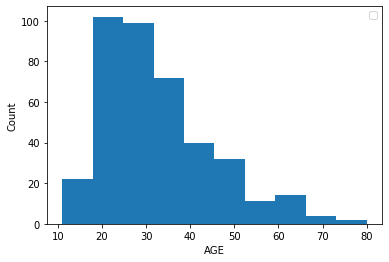

In [945]:
plt.hist(grouped_title.get_group('Mr').Age)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.legend()
plt.show()

In [946]:
print('MEAN')
print(grouped_title.get_group('Mr').Age.mean())
print("-"*40)
print('MEDIAN')
print(grouped_title.get_group('Mr').Age.median())
print('-'*40)
print('MODE')
print(grouped_title.get_group('Mr').Age.mode())

MEAN
32.368090452261306
----------------------------------------
MEDIAN
30.0
----------------------------------------
MODE
0    19.0
1    25.0
dtype: float64


No handles with labels found to put in legend.


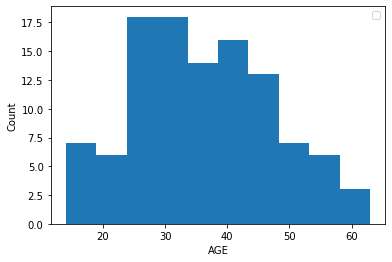

In [947]:
plt.hist(grouped_title.get_group('Mrs').Age)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.legend()
plt.show()

In [948]:
print('MEAN')
print(grouped_title.get_group('Mrs').Age.mean())
print("-"*40)
print('MEDIAN')
print(grouped_title.get_group('Mrs').Age.median())
print('-'*40)
print('MODE')
print(grouped_title.get_group('Mrs').Age.mode())

MEAN
35.898148148148145
----------------------------------------
MEDIAN
35.0
----------------------------------------
MODE
0    24.0
dtype: float64


No handles with labels found to put in legend.


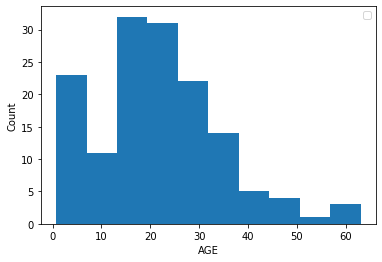

In [949]:
plt.hist(grouped_title.get_group('Miss').Age)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.legend()
plt.show()

In [950]:
print('MEAN')
print(grouped_title.get_group('Mrs').Age.mean())
print("-"*40)
print('MEDIAN')
print(grouped_title.get_group('Mrs').Age.median())
print('-'*40)
print('MODE')
print(grouped_title.get_group('Mrs').Age.mode())

MEAN
35.898148148148145
----------------------------------------
MEDIAN
35.0
----------------------------------------
MODE
0    24.0
dtype: float64


**The distribution is mostly leftly skewed so the best way to fill the misiing values is to group by their titles and fill in the the median value**

We should map the data['Title'] first inorder to miss in the values

In [951]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

train_df['Title'] = train_df['Title'].map(title_mapping)
test_df['Title']=test_df['Title'].map(title_mapping)

In [952]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df["Age"].fillna(test_df.groupby("Title")["Age"].transform("median"), inplace=True)

In [953]:
train_df.isna().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
Cabin         687
Embarked        2
FamilySize      0
Title           0
dtype: int64

In [954]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
Title            0
dtype: int64

In [955]:
train_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [956]:
train_df.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
D              3
              ..
T              1
E50            1
C46            1
C82            1
E63            1
Name: Cabin, Length: 147, dtype: int64

**As there are lot of missing values in cabin it is not a bad idea to drop that column**

In [957]:
train_df=train_df.drop('Cabin',axis=1)

In [958]:
test_df=test_df.drop('Cabin',axis=1)

In [959]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,7.2500,S,2,0
1,1,1,female,38.0,71.2833,C,2,2
2,1,3,female,26.0,7.9250,S,1,1
3,1,1,female,35.0,53.1000,S,2,2
4,0,3,male,35.0,8.0500,S,1,0


In [960]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [961]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**We will fill the missing values of embarked with S as there are only two of them and S is the most common value**

In [962]:
#fill out missing embark with S embark
train_df['Embarked']=train_df['Embarked'].fillna('S')
test_df['Embarked']=test_df['Embarked'].fillna('S')

In [963]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
FamilySize     0
Title          0
dtype: int64

In [964]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

**We have filled in all the missing values now we have to map the catogorical values in order to feed the machine learning algorithm**

In [965]:
sex_mapping = {"male": 0, "female": 1}
train_df['Sex']=train_df['Sex'].map(sex_mapping)
test_df['Sex']=test_df['Sex'].map(sex_mapping)

In [966]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,7.2500,S,2,0
1,1,1,1,38.0,71.2833,C,2,2
2,1,3,1,26.0,7.9250,S,1,1
3,1,1,1,35.0,53.1000,S,2,2
4,0,3,0,35.0,8.0500,S,1,0


In [967]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train_df['Embarked']=train_df['Embarked'].map(embarked_mapping)
test_df['Embarked']=test_df['Embarked'].map(embarked_mapping)

In [968]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,7.2500,0,2,0
1,1,1,1,38.0,71.2833,1,2,2
2,1,3,1,26.0,7.9250,0,1,1
3,1,1,1,35.0,53.1000,0,2,2
4,0,3,0,35.0,8.0500,0,1,0


In [969]:
train_df.shape

(891, 8)

In [970]:
test_df.shape

(418, 8)

In [971]:
train_x=train_df.drop('Survived',axis=1)
train_y=train_df.Survived

In [972]:
train_x.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,3,0,22.0,7.2500,0,2,0
1,1,1,38.0,71.2833,1,2,2
2,3,1,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,0,2,2
4,3,0,35.0,8.0500,0,1,0


In [973]:
train_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# 5. Modelling

### Cross Validation (K-fold)

In [974]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## KNN

In [975]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5,  p = 2)

In [976]:
knn=cross_val_score(KNeighborsClassifier(),train_x,train_y,cv=10)

In [977]:
np.array(knn).mean()

0.7217103620474408

## Random forest

In [978]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)

In [979]:
rf=cross_val_score(RandomForestClassifier(),train_x,train_y,cv=10)

In [980]:
np.array(rf).mean()

0.8070411985018726

## logistic regression

In [981]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state =42)

In [982]:
lr=cross_val_score(LogisticRegression(),train_x,train_y,cv=10)

C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

In [983]:
np.array(lr).mean()

0.8170661672908863

## Descision tree

In [984]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)

In [985]:
dt=cross_val_score(DecisionTreeClassifier(),train_x,train_y,cv=10)

In [986]:
np.array(dt).mean()

0.775605493133583

## Support vector machine


In [987]:
#support vector machine
from sklearn import svm
from sklearn import metrics
cls=svm.SVC()

In [988]:
svm=cross_val_score(svm.SVC(),train_x,train_y,cv=10)

In [989]:
np.array(svm).mean()

0.6813358302122346

## Xgboost

In [990]:
#xgboost algorithm
import xgboost as xgb
xgb=xgb.XGBClassifier()

In [991]:
xgb=cross_val_score(xgb,train_x,train_y,cv=10)

In [992]:
np.array(xgb).mean()

0.8081273408239701

## Bagging

In [993]:
#Bagging 
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)

In [994]:
bgc=cross_val_score(bg,train_x,train_y,cv=10)

In [995]:
np.array(bgc).mean()

0.8283520599250936

## Voting classifier

**As  Bagging,Randomforest,Logistic regression,xgboost have highest score we will try to make a voting classifer and try to get more score**

In [996]:
import xgboost as xgb 
xgb_evc = xgb.XGBClassifier()
rf_evc = RandomForestClassifier()


bg_evc = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)


In [997]:
evc = VotingClassifier( estimators= [('xgb_evc',xgb_evc),('rf_evc',rf_evc),('bg_evc',bg_evc)], voting = 'hard')

In [998]:
evc_score=cross_val_score(evc,train_x,train_y,cv=10)

In [999]:
np.array(evc_score).mean()

0.8159925093632958

**We can see  that accuracy score has improved a little then using algorithms alone.**

**Now we can perform Hyperparamtere Tuning to improve the accuraccy**

In [1000]:
from sklearn.model_selection import RandomizedSearchCV


XGBOOST

In [1001]:
xgb_param={'max_depth':[1,2,5,6,7,8,9,12,15,18,20,25,22,24],'learning_rate':[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,1],
          'gamma':[0.1,0.2,.3,.5,6.6,.7,.8],'min_child_weight':[1,3,5,6,7,8,9,10,12,11]}

In [1002]:
rand_cv_xgb=RandomizedSearchCV(xgb_evc,xgb_param,n_jobs=-1,cv=10)

In [1003]:
rand_cv_xgb.fit(train_x,train_y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'gamma': [0.1, 0.2, 0.3, 0.5, 6.6, 0.7,
                                                  0.8],
                             

In [1004]:

rand_cv_xgb.best_params_



{'min_child_weight': 7, 'max_depth': 18, 'learning_rate': 1, 'gamma': 0.3}

In [1005]:

rand_cv_xgb.best_score_


0.842896379525593

BAGGING

In [1006]:
bg_param={'max_samples':[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1],'max_features':[1,2,3,4,5,6,7,8],
          'n_estimators':[10,20,30,40,50,60,70,80,100,200,300,400,500,1000,100000],'bootstrap':[True,False],
          'bootstrap_features':[True,False],'oob_score':[True,False],'warm_start':[False,True]
          
         }

In [1007]:
rand_cv_bg=RandomizedSearchCV(bg_evc,bg_param,n_jobs=-1,cv=10)

In [1008]:
rand_cv_bg.fit(train_x,train_y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                     class_weight=None,
                                                                                     criterion='gini',
                                                                                     max_depth=None,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
                                                                                     min_samples_leaf=1,
            

In [1009]:
rand_cv_bg.best_params_

{'warm_start': False,
 'oob_score': True,
 'n_estimators': 100,
 'max_samples': 0.5,
 'max_features': 2,
 'bootstrap_features': False,
 'bootstrap': True}

In [1010]:
rand_cv_bg.best_score_

0.835043695380774

RANDOM FOREST

In [1011]:
rf_param={'bootstrap':['True','False'],'criterion':['gini','entropy'],'max_depth':[None,1,2,3,4,5,6,7,10,50],
         'n_estimators':[100,200,300,4000,500,10000,150,20,30,40,50,80,90],
          'max_features':[1,2,4,6,8,10,11,12,13,15,17,19,20,22,24,26,28],
          "random_state" :[None,10,5,18,13,1,23,45,2,3,5,7]}

In [1012]:
rand_cv_rf=RandomizedSearchCV(rf_evc,rf_param,n_jobs=-1,cv=10)

In [1013]:
rand_cv_rf.fit(train_x,train_y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [1014]:
rand_cv_rf.best_params_

{'random_state': 13,
 'n_estimators': 500,
 'max_features': 6,
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': 'True'}

In [1015]:
rand_cv_rf.best_score_

0.817103620474407

**Now let us define the machine learning model again with the hyper paramters we just got**

In [1016]:
xgb_evc_tun = xgb.XGBClassifier(min_child_weight= 11, max_depth= 6, learning_rate=1, gamma= 0.2)

rf_evc_tun = RandomForestClassifier(random_state=45, n_estimators= 10000,max_features= 4,max_depth=10,criterion= 'entropy',
bootstrap= False)

bg_evc_tun= BaggingClassifier(DecisionTreeClassifier(), warm_start= False,oob_score= False,n_estimators= 80,
           max_samples= 0.4,max_features= 5,bootstrap_features=False,bootstrap=True)

In [1017]:
evc_tun = VotingClassifier( estimators= [('xgb_evc_tun',xgb_evc_tun),('rf_evc_tun',rf_evc_tun),
                                         ('bg_evc_tun',bg_evc_tun)], voting = 'soft')

In [1031]:
evc_tun.fit(train_x,train_y)

VotingClassifier(estimators=[('xgb_evc_tun',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0.2,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=1, max_delta_step=0,
                                            max_depth=6, min_child_weight=11,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num...
                                                                                      min_impurity_split=None,
   

In [1029]:
evc_score_tun=cross_val_score(evc_tun,train_x,train_y,cv=10)
np.array(evc_score_tun).mean()

0.845143570536829

In [1019]:
xgb_score_tun=cross_val_score(xgb_evc_tun,train_x,train_y,cv=10)
np.array(xgb_score_tun).mean()

0.8406991260923846

In [1020]:
rf_score_tun=cross_val_score(rf_evc_tun,train_x,train_y,cv=10)
np.array(rf_score_tun).mean()

0.8260923845193509

In [1021]:
bg_score_tun=cross_val_score(bg_evc_tun,train_x,train_y,cv=10)
np.array(bg_score_tun).mean()

0.8361922596754058

**As expected  the voteing classifiers  has the highest accuraccy**

## Saving the model

In [1022]:
# Pickle
import pickle
 
# save model

In [1023]:
with open ("titanic","wb") as f:
    pickle.dump(xgb_evc_tun,f)
    

In [1045]:
test_data['Fare']=test_data['Fare'].fillna(test_data.loc[:,'Fare'].median())

In [1049]:
prediction=evc_tun.predict(test_data)

In [1052]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': prediction})
output.to_csv('my_submission_4.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
